In [99]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
teta = 7
betta = 0.95
n = 100

In [100]:
x_n = sps.pareto.rvs(b =teta-1, size = n)
print(x_n)
print("med = ", np.median(x_n))


[1.08537305 1.19123444 1.0512368  1.02565947 1.09804784 1.25689096
 1.02790534 1.00277068 1.03910883 1.05959629 1.46514797 1.5287441
 1.05852613 1.33221674 1.12368818 1.10622349 1.05705525 1.05501757
 1.02825456 1.3284449  1.07698616 1.08973133 1.05371383 1.07592519
 2.06412893 1.15544902 1.07957421 1.08271701 1.0988032  1.02932854
 1.34461541 1.00137218 1.14260276 1.01491577 1.20066614 1.02207524
 1.09052327 1.0353699  1.01360026 1.0458484  1.11860693 1.07681335
 1.00760179 1.06031409 1.88036056 1.02122592 1.31865754 1.00824869
 1.00457399 1.21238847 1.03963516 1.33495042 2.43302948 1.51121315
 1.47780155 1.15016497 1.25329946 1.01248738 1.03797372 1.18429733
 1.34704821 1.33415158 1.07309118 1.27919945 1.06443268 1.09144234
 1.06992559 1.38527217 1.83217663 1.01059853 1.10194453 1.2550598
 1.05408437 1.03203219 1.03912782 1.29852517 1.02447435 1.17158762
 1.44474213 1.42128059 1.32875111 1.00337999 1.31379032 1.23136465
 1.28499521 1.14535582 1.08564777 1.17930529 1.39842781 1.003963

In [101]:
# Асимптотический доверительный интервал для med (через ММП)

teta_mmp = n/np.sum(np.log(x_n)) + 1
t1 = sps.norm(loc = 0, scale = 1).ppf((1-betta)/2)
t2 = sps.norm(loc = 0, scale = 1).ppf((1+betta)/2)

board1 = 2**((teta_mmp - 1)**(-1)) - (np.log(2) * 2**((teta_mmp - 1)**(-1)) * t2) / (n**0.5 * (teta_mmp - 1)) 
board2 = 2**((teta_mmp - 1)**(-1)) - (np.log(2) * 2**((teta_mmp - 1)**(-1)) * t1) / (n**0.5 * (teta_mmp - 1))
l = board2 - board1
print("Доверительный интервал: (", board1, ";", board2, ")")
print("Длина доверительного интервала", l)

Доверительный интервал: ( 1.087559814257968 ; 1.13311397096751 )
Длина доверительного интервала 0.04555415670954188


In [102]:
# Асимптотический доверительный интервал для параметра teta (через ММП)

teta_mmp = n/np.sum(np.log(x_n)) + 1
t1 = sps.norm(loc = 0, scale = 1).ppf((1-betta)/2)
t2 = sps.norm(loc = 0, scale = 1).ppf((1+betta)/2)

board1_mmp = teta_mmp - ((teta_mmp - 1) * t2) / n**0.5
board2_mmp = teta_mmp - ((teta_mmp - 1) * t1) / n**0.5
l = board2_mmp - board1_mmp
print("Доверительный интервал: (", board1_mmp, ";", board2_mmp, ")")
print("Длина доверительного интервала", l)

Доверительный интервал: ( 6.324616094919966 ; 8.920638241457185 )
Длина доверительного интервала 2.5960221465372193


In [103]:
# Бутстраповский параметрический доверительный интервал

def get_bootstrap(x, n_sample):
    sample = np.random.choice(x, size = (x.size, n_sample), replace = True)
    return sample

N = 50000
x_boot = get_bootstrap(x_n, N)
x_boot_omm = np.sort(n / np.sum(np.log(x_boot), axis = 0) + 1) # вариац ряд
k1 = int((1 - betta) * N / 2)
k2 = int((1 + betta) * N / 2)

board1_boot_p = x_boot_omm[k1]
board2_boot_p = x_boot_omm[k2]
l = board2_boot_p - board1_boot_p
print("Доверительный интервал: (", board1_boot_p, ";", board2_boot_p, ")")
print("Длина доверительного интервала", l)

Доверительный интервал: ( 6.428709472554331 ; 9.292641994994112 )
Длина доверительного интервала 2.8639325224397805


In [104]:
# Бутстраповский непараметрический доверительный интервал

def get_bootstrap(x, n_sample):
    sample = np.random.choice(x, size = (x.size, n_sample), replace = True)
    return sample

N = 1000
x_boot = get_bootstrap(x_n, N)
teta_mmp = n/np.sum(np.log(x_n)) + 1
teta_boot = n / np.sum(np.log(x_boot), axis = 0) + 1

delta = teta_boot - teta_mmp
delta_sort = np.sort(delta) # вариац ряд
k1 = int((1 - betta) * N / 2)
k2 = int((1 + betta) * N / 2)

board1_boot = teta_mmp - delta_sort[k2]
board2_boot = teta_mmp - delta_sort[k1]
l = board2_boot - board1_boot
print("Доверительный интервал: (", board1_boot, ";", board2_boot, ")")
print("Длина доверительного интервала", l)

Доверительный интервал: ( 5.842736029143378 ; 8.784844594443516 )
Длина доверительного интервала 2.9421085653001384


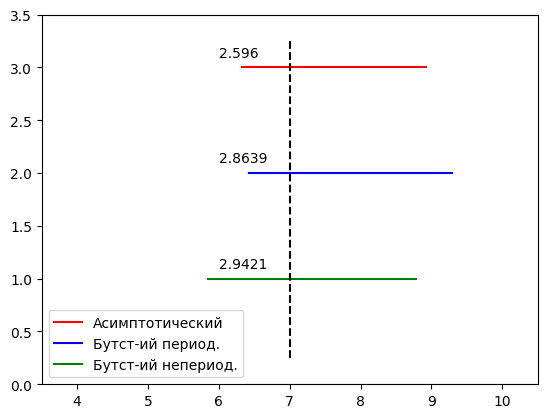

In [105]:
# Сравнение доверительных интервалов

plt.xlim(teta*0.5, teta*1.5)
plt.ylim(0, 3.5)

plt.text(teta - 1, 3.1, round(board2_mmp - board1_mmp, 4))
plt.plot([board1_mmp, board2_mmp], [3,3], color='r', label = "Асимптотический")

plt.text(teta - 1, 2.1, round(board2_boot_p - board1_boot_p, 4))
plt.plot([board1_boot_p, board2_boot_p], [2,2], color='b', label = "Бутст-ий период.")

plt.text(teta - 1, 1.1, round(board2_boot - board1_boot, 4))
plt.plot([board1_boot, board2_boot], [1,1], color='green', label = "Бутст-ий непериод.")

plt.plot([teta, teta], [0.25,3.25], color='black', linestyle='--')
plt.legend()